# Import Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score,silhouette_samples

In [2]:
df = pd.read_csv("Mall_Customer.csv")

# Data Exploration

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
185,186,Male,30,99,97
187,188,Male,28,101,68
154,155,Female,47,78,16
193,194,Female,38,113,91
170,171,Male,40,87,13
29,30,Female,23,29,87
14,15,Male,37,20,13
152,153,Female,44,78,20
46,47,Female,50,40,55
110,111,Male,65,63,52


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#  Data Visualization

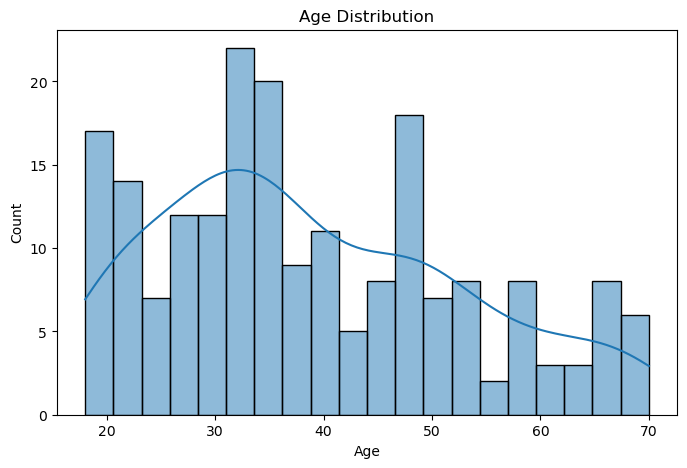

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


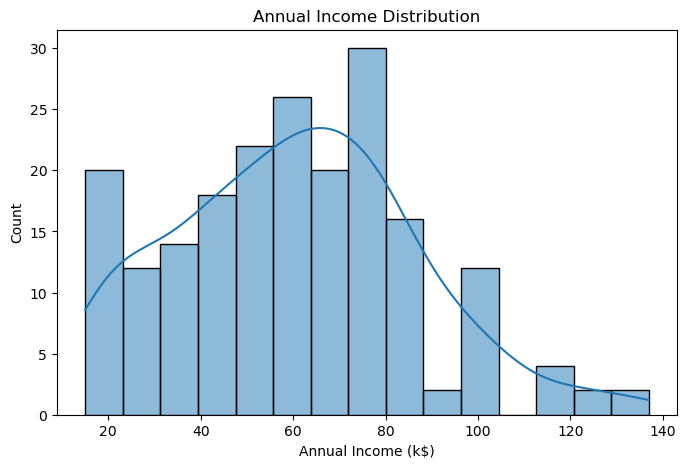

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Annual Income (k$)', bins=15, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

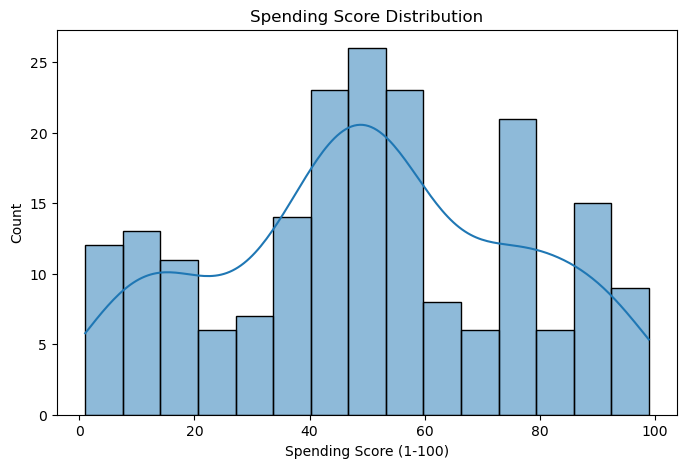

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Spending Score (1-100)', bins=15, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()


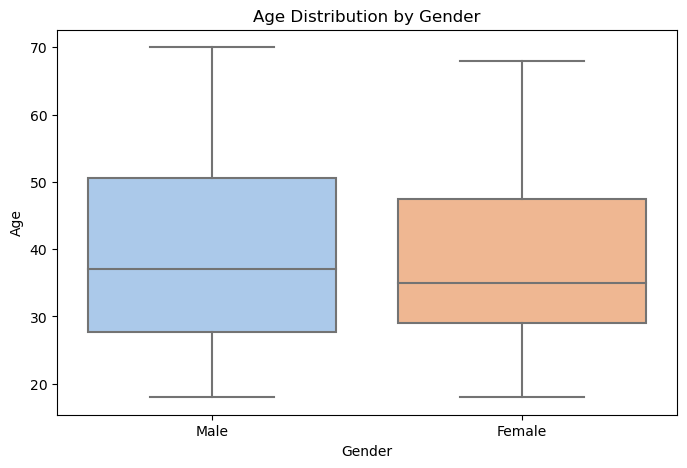

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Age', palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

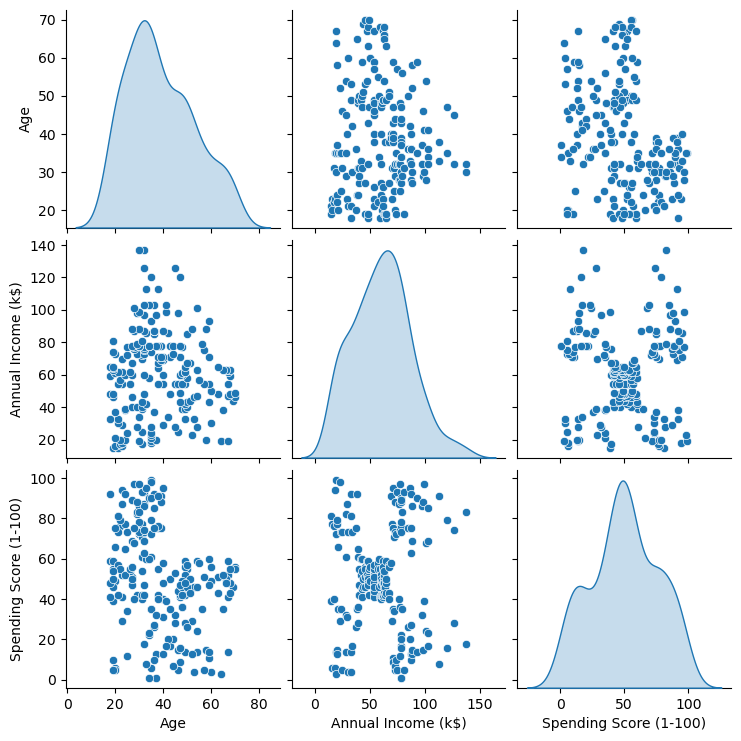

In [14]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()

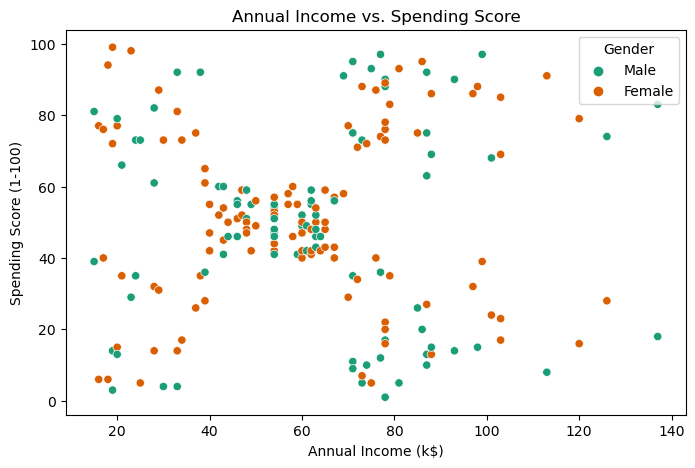

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Dark2')
plt.title('Annual Income vs. Spending Score')
plt.show()

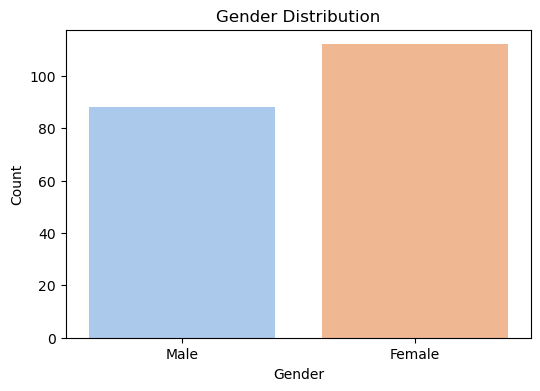

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# K-Means Clustering

In [17]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42,n_init=10)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

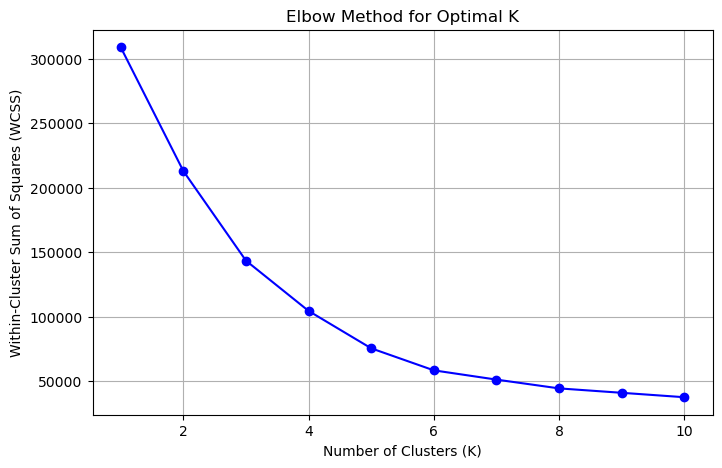

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [19]:
chosen_k = 5
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', random_state=42,n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


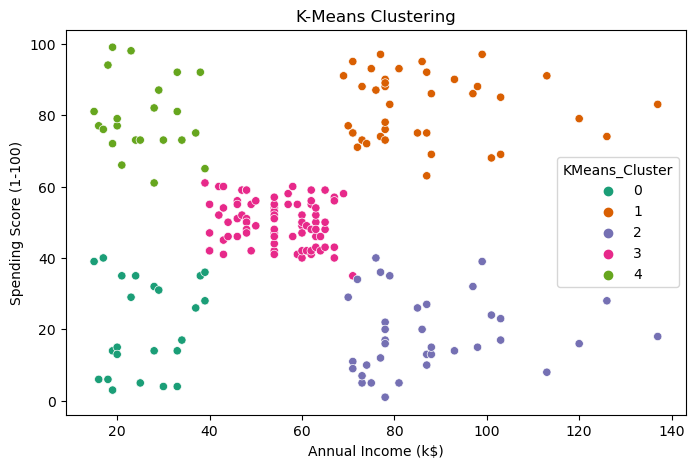

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='Dark2')
plt.title('K-Means Clustering')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


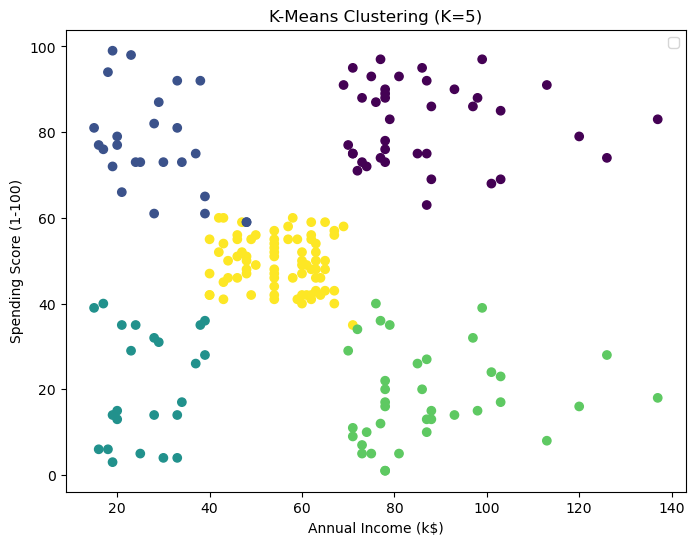

In [23]:
# User defined class for Kmeans 
class KMeansCustom:
    def __init__(self, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, data):
        self.data = data
        self.n_samples, self.n_features = data.shape
        self.centroids = data[np.random.choice(self.n_samples, self.n_clusters, replace=False)]
        self.cluster_assignments = np.zeros(self.n_samples)

        for _ in range(self.max_iters):
            for i in range(self.n_samples):
                distances = np.linalg.norm(self.centroids - data[i], axis=1)
                self.cluster_assignments[i] = np.argmin(distances)

            new_centroids = np.array([data[self.cluster_assignments == k].mean(axis=0) for k in range(self.n_clusters)])

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def plot_clusters(self):
        plt.figure(figsize=(8, 6))
        plt.scatter(self.data[:, 1], self.data[:, 2], c=self.cluster_assignments, cmap='viridis')
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score (1-100)')
        plt.title(f'K-Means Clustering (K={self.n_clusters})')
        plt.legend()
        plt.show()

chosen_k = 5
np.random.seed(42)
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

kmeans_custom = KMeansCustom(n_clusters=chosen_k)
kmeans_custom.fit(data)
kmeans_custom.plot_clusters()

# K-Means++ Clustering

In [24]:
wcss_kmeans_pp = []
k_values = range(1, 11)
for k in k_values:
    kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42,n_init=10)
    kmeans_pp.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss_kmeans_pp.append(kmeans_pp.inertia_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

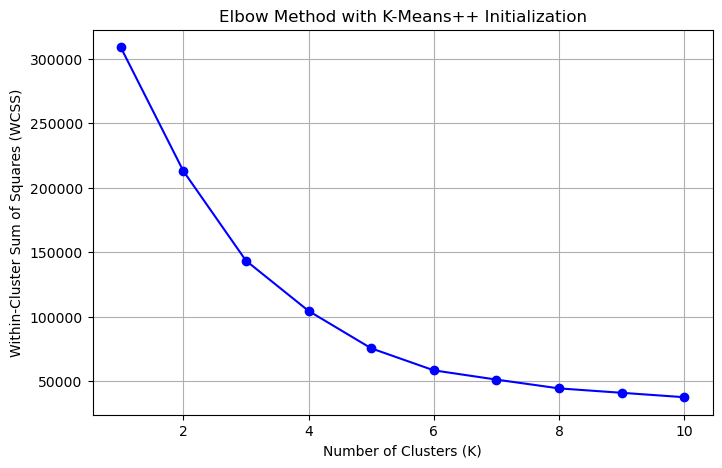

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss_kmeans_pp, marker='o', linestyle='-', color='b')
plt.title('Elbow Method with K-Means++ Initialization')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


In [26]:
chosen_k = 5
kmeans_pp = KMeans(n_clusters=chosen_k, init='k-means++', random_state=42,n_init=10)
df['KMeans_Cluster'] = kmeans_pp.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


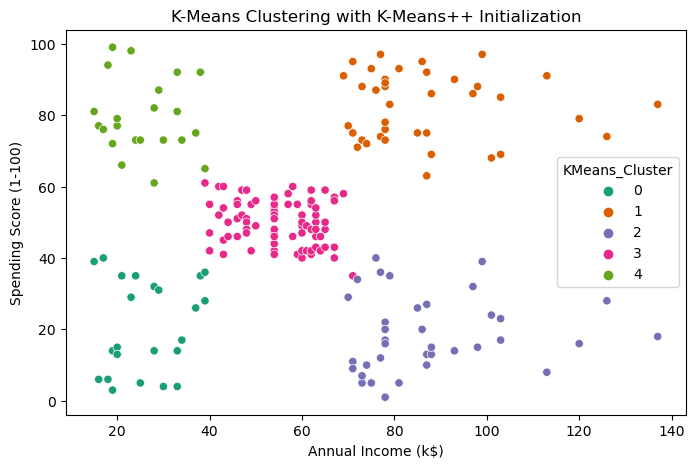

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='Dark2')
plt.title('K-Means Clustering with K-Means++ Initialization')
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [28]:
dbscan = DBSCAN(eps=0.1, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

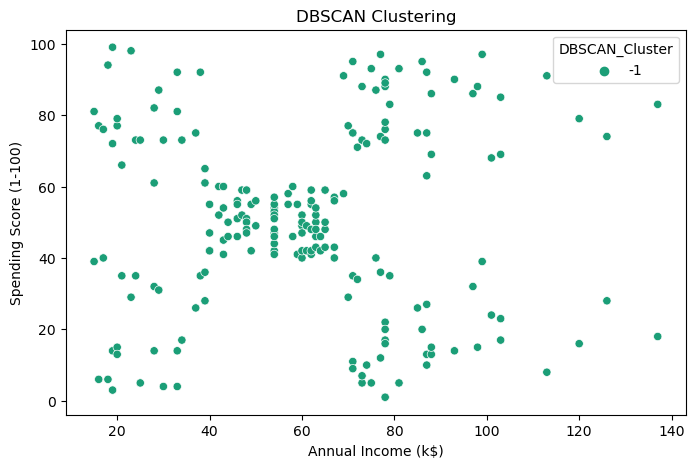

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='Dark2')
plt.title('DBSCAN Clustering')
plt.show()